# Table of contents

1. [offer data, only accepted ones](#acc_offer_data)
2. [Instagram follower count](#follower_count)
  

- 都道府県別の採用されたインフルエンサーの平均フォロワー数 - クオーター毎に

- copied from 'offer_count_accepted_influencer_follower_count_by_prefecture.ipynb'

In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
# import japanmap

In [4]:
import matplotlib.pyplot as plt
# import seaborn as sns

In [5]:
font = {"family":"IPAexGothic"}
plt.rc('font', **font)

In [6]:
map_pref = {
1: '北海道',
2: '青森県',
3: '岩手県',
4: '宮城県',
5: '秋田県',
6: '山形県',
7: '福島県',
8: '茨城県',
9: '栃木県',
10: '群馬県',
11: '埼玉県',
12: '千葉県',
13: '東京都',
14: '神奈川県',
15: '新潟県',
16: '富山県',
17: '石川県',
18: '福井県',
19: '山梨県',
20: '長野県',
21: '岐阜県',
22: '静岡県',
23: '愛知県',
24: '三重県',
25: '滋賀県',
26: '京都府',
27: '大阪府',
28: '兵庫県',
29: '奈良県',
30: '和歌山県',
31: '鳥取県',
32: '島根県',
33: '岡山県',
34: '広島県',
35: '山口県',
36: '徳島県',
37: '香川県',
38: '愛媛県',
39: '高知県',
40: '福岡県',
41: '佐賀県',
42: '長崎県',
43: '熊本県',
44: '大分県',
45: '宮崎県',
46: '鹿児島',
47: '沖縄県'
}

In [7]:
map_pref2 = {
1: '1: 北海道',
2: '2: 青森県',
3: '3: 岩手県',
4: '4: 宮城県',
5: '5: 秋田県',
6: '6: 山形県',
7: '7: 福島県',
8: '8: 茨城県',
9: '9: 栃木県',
10: '10: 群馬県',
11: '11: 埼玉県',
12: '12: 千葉県',
13: '13: 東京都',
14: '14: 神奈川県',
15: '15: 新潟県',
16: '16: 富山県',
17: '17: 石川県',
18: '18: 福井県',
19: '19: 山梨県',
20: '20: 長野県',
21: '21: 岐阜県',
22: '22: 静岡県',
23: '23: 愛知県',
24: '24: 三重県',
25: '25: 滋賀県',
26: '26: 京都府',
27: '27: 大阪府',
28: '28: 兵庫県',
29: '29: 奈良県',
30: '30: 和歌山県',
31: '31: 鳥取県',
32: '32: 島根県',
33: '33: 岡山県',
34: '34: 広島県',
35: '35: 山口県',
36: '36: 徳島県',
37: '37: 香川県',
38: '38: 愛媛県',
39: '39: 高知県',
40: '40: 福岡県',
41: '41: 佐賀県',
42: '42: 長崎県',
43: '43: 熊本県',
44: '44: 大分県',
45: '45: 宮崎県',
46: '46: 鹿児島',
47: '47: 沖縄県'
}

# offer data, only approved ones <a name="acc_offer_data"></a>

In [8]:
# select offers.id as offer_id, offers.campaign_id, offers.user_influencer_id, 
# date_format(offers.created_at, '%Y-%m-%d %H:%i:%s') as created_at, 
#  offers.status,
# campaigns.pref, campaigns.project_type,
# summary_user_influencers.instagram_follower_count
# from offers
# left join campaigns
# on offers.campaign_id = campaigns.id
# left join summary_user_influencers
# on offers.user_influencer_id = summary_user_influencers.user_influencer_id
# where offers.status in (10,20,21,30,31,15,16) 
# and (offers.created_at >= '2020-01-01')

In [9]:
# df = pd.read_csv('1079958_2020_09_25_offers_campaigns.csv')
df = pd.read_csv('New_Query_2020_10_22_offers_campaign_followercount.csv')

In [10]:
df.head()

,offer_id,campaign_id,user_influencer_id,created_at,status,pref,project_type,instagram_follower_count
0,81223,2648,57,2020-01-06 16:19:20,21,NaN,10,50220.0
1,86636,2727,57,2020-01-16 17:00:11,21,NaN,10,50220.0
2,98300,2979,57,2020-02-10 08:48:57,21,13.0,10,50220.0
3,102187,3121,57,2020-02-18 15:41:22,21,13.0,10,50220.0
4,82689,2662,98,2020-01-08 22:02:20,21,NaN,10,2304.0


In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [12]:
min(df['created_at'])

Timestamp('2020-01-01 00:07:02')

In [13]:
max(df['created_at'])

Timestamp('2020-10-22 08:35:34')

In [14]:
len(df)

26786

In [15]:
df.dropna(subset = ['pref'], inplace = True)

In [16]:
len(df)

15933

In [78]:
# - 10: モニター型
# - 20: 投稿報酬型

# Instagram follower count <a name="follower_count"></a>

In [86]:
# df_acc_inf_follower_count_by_pref = df.drop_duplicates(subset = ['pref','user_influencer_id'], keep = "last")
# df_acc_inf_follower_count_by_pref = df_acc_inf_follower_count_by_pref[['offer_id', 'pref', 'user_influencer_id', 'instagram_follower_count']]

# df_offers_per_campaign_by_pref = (df_all_offers.groupby(['pref','campaign_id'])['offer_id'].size()
#                                   .reset_index()
#                                   .rename(columns = {'offer_id':'offer_count'})
#                                  )
# df_offers_per_campaign_by_pref_average = (df_offers_per_campaign_by_pref.groupby('pref')['offer_count'].mean()
#                                           .reset_index()
#                                           .rename(columns = {'offer_count':'average_offer_count'})
#                                          )

In [87]:
df.head(2)

,offer_id,campaign_id,user_influencer_id,created_at,status,pref,project_type,instagram_follower_count
2,98300,2979,57,2020-02-10 08:48:57,21,13.0,10,50220.0
3,102187,3121,57,2020-02-18 15:41:22,21,13.0,10,50220.0


In [88]:
df_acc_inf_follower_pref_ave = pd.pivot_table(df, 
                                              values = 'instagram_follower_count', 
                                              index = ['pref'],
                                              columns = ['project_type'], 
                                              aggfunc = np.mean).rename(columns ={10: 'average_follower_count_free',
                                                                                 20: 'average_follower_count_paid'})


In [89]:
df_acc_inf_follower_pref_ave.head()

project_type,average_follower_count_free,average_follower_count_paid
pref,,
1.0,9619.192053,14453.5
3.0,27177.000000,NaN
4.0,16934.350000,NaN
8.0,9178.857143,52908.0
9.0,14818.638889,NaN


In [90]:
# calculate accepted offer count to see if average follower count is representative of the pref

df_acc_inf_count_pref = pd.pivot_table(df, 
                                       values = 'offer_id', 
                                       index = ['pref'],
                                       columns = ['project_type'], 
                                       aggfunc = 'count').rename(columns ={10: 'approved_count_free',
                                                                                 20: 'approved_count_paid'})


In [91]:
df_acc_inf_count_pref.head()

project_type,approved_count_free,approved_count_paid
pref,,
1.0,151.0,2.0
3.0,1.0,NaN
4.0,20.0,NaN
8.0,7.0,2.0
9.0,36.0,NaN


In [92]:
df_acc_inf_pref = (df_acc_inf_count_pref.merge(df_acc_inf_follower_pref_ave,
                                             how = 'left',
                                             left_on = df_acc_inf_count_pref.index,
                                             right_on = df_acc_inf_follower_pref_ave.index)
                   .rename(columns = {'key_0':'pref'})
                  )

In [93]:
df_acc_inf_pref['pref_kanji'] = df_acc_inf_pref['pref'].map(map_pref2)

In [94]:
df_acc_inf_pref.head(2)

project_type,pref,approved_count_free,approved_count_paid,average_follower_count_free,average_follower_count_paid,pref_kanji
0,1.0,151.0,2.0,9619.192053,14453.5,1: 北海道
1,3.0,1.0,NaN,27177.000000,NaN,3: 岩手県


### change average_follower_count to 0 if only 1 accepted influencer in that pref

In [95]:
df_acc_inf_pref.loc[(df_acc_inf_pref.approved_count_free < 2),
                                          'average_follower_count_free'] = 0

df_acc_inf_pref.loc[(df_acc_inf_pref.approved_count_paid < 2),
                                          'average_follower_count_paid'] = 0

In [128]:
df_acc_inf_pref.fillna(0, inplace = True)

In [146]:
df_acc_inf_pref['pref'] = df_acc_inf_pref['pref'].astype(int)

In [187]:
df_acc_inf_pref.head()

project_type,pref,approved_count_free,approved_count_paid,average_follower_count_free,average_follower_count_paid,pref_kanji
0,1,151.0,2.0,9619.192053,14453.5,1: 北海道
1,3,1.0,0.0,0.000000,0.0,3: 岩手県
2,4,20.0,0.0,16934.350000,0.0,4: 宮城県
3,8,7.0,2.0,9178.857143,52908.0,8: 茨城県
4,9,36.0,0.0,14818.638889,0.0,9: 栃木県


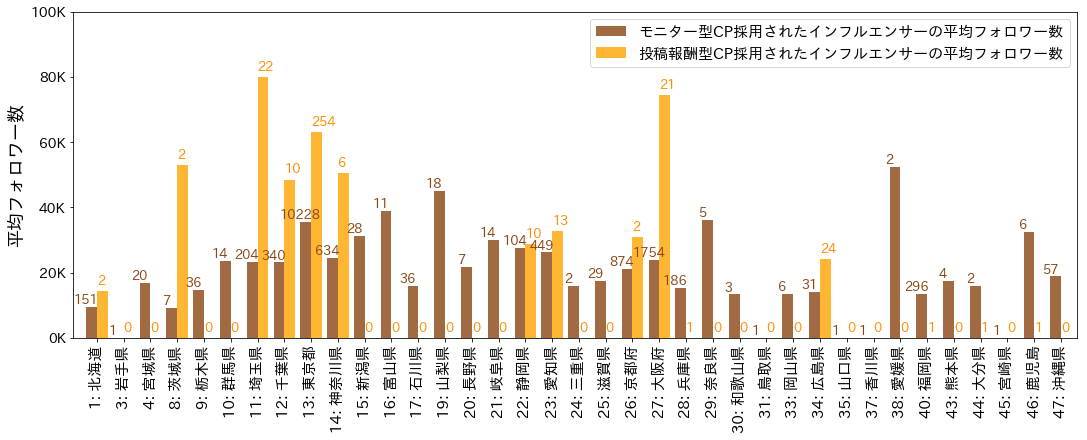

In [184]:
ind = np.arange(len(df_acc_inf_pref))
width = 0.4

fig, ax1 = plt.subplots(figsize=(18, 6)) 

# free campaigns
bar1 = ax1.bar(ind, 
        df_acc_inf_pref['average_follower_count_free'],
        width = width,
        align='edge',
       label = 'モニター型CP採用されたインフルエンサーの平均フォロワー数', color = 'saddlebrown', alpha = 0.8)

counter = 0
for bar in bar1:
    yval = bar.get_height()
    approved_count = df_acc_inf_pref.iloc[counter].loc['approved_count_free']
    approved_count = approved_count.astype(int)
    plt.text(bar.get_x(), yval + 1000, approved_count, fontsize = 13, ha = 'center', color = 'saddlebrown') # , rotation = 10
    counter += 1

# paid campaigns
bar2 = ax1.bar(ind+width, 
        df_acc_inf_pref['average_follower_count_paid'],
        width = width,
        align='edge',
       label = '投稿報酬型CP採用されたインフルエンサーの平均フォロワー数', color = 'orange', alpha = 0.8)

counter = 0
for bar in bar2:
    yval = bar.get_height()
    approved_count = df_acc_inf_pref.iloc[counter].loc['approved_count_paid']
    approved_count = approved_count.astype(int)
    plt.text(bar.get_x(), yval + 2000, approved_count, fontsize = 13, ha = 'left', color = 'darkorange') # , rotation = 10
    counter += 1

ax1.legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 15)

plt.xlim(-0.5,len(df_acc_inf_pref))
ax1.set_xticks(ind + width)
ax1.set_xticklabels(df_acc_inf_pref['pref_kanji'],
                    rotation = 90,
                      ha = 'center', fontsize = 15)

plt.ylim(0,100000)
plt.yticks(fontsize = 14)
ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax1.get_yticks()/1000]
ax1.set_yticklabels(ylabels)

ax1.set_ylabel('平均フォロワー数', fontsize = 18, labelpad = 5)

plt.show()

In [186]:
# fig, ax1 = plt.subplots(figsize=(18, 6)) 

# bars = ax1.bar(ind, 
#         df_acc_inf_pref['average_follower_count_free'],
#         width = 0.5,
#         align='center',
#         label = 'モニター型CP採用されたインフルエンサーの平均フォロワー数', 
#         color = 'saddlebrown', 
#         alpha = 0.6)

# # access the bar attributes to place the text in the appropriate location
# counter = 0
# for bar in bars:
#     yval = bar.get_height()
#     approved_count = df_acc_inf_pref.iloc[counter].loc['approved_count_free']
#     approved_count = approved_count.astype(int)
#     plt.text(bar.get_x(), yval + 1000, approved_count, fontsize = 13)
#     counter += 1

# ax1.legend(bbox_to_anchor = (1,1), loc = "upper right", fontsize = 15)

# ax1.set_ylabel('平均フォロワー数', fontsize = 18, labelpad = 10)
# plt.xlim(-0.5,len(df_acc_inf_pref))
# ax1.set_xticks(ind)
# ax1.set_xticklabels(df_acc_inf_pref['pref_kanji'], rotation = 90,
#                       ha = 'center', fontsize = 15)

# plt.ylim(0,100000)
# plt.yticks(fontsize = 14)
# ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax1.get_yticks()/1000]
# ax1.set_yticklabels(ylabels)

# plt.show()

In [185]:
# fig, ax1 = plt.subplots(figsize=(18, 6)) 

# bars = ax1.bar(ind, 
#         df_acc_inf_pref['average_follower_count_paid'],
#         width = 0.5,
#         align='center',
#         label = '投稿報酬型CP採用されたインフルエンサーの平均フォロワー数', 
#         color = 'orange', 
#         )

# counter = 0
# for bar in bars:
#     yval = bar.get_height()
#     approved_count = df_acc_inf_pref.iloc[counter].loc['approved_count_paid']
#     approved_count = approved_count.astype(int)
#     plt.text(bar.get_x(), yval+1000, approved_count, fontsize = 13)
#     counter += 1

# ax1.legend(bbox_to_anchor = (1,1), loc = "upper right", fontsize = 15)

# ax1.set_ylabel('平均フォロワー数', fontsize = 18, labelpad = 10)
# plt.xlim(-0.5,len(df_acc_inf_pref))
# ax1.set_xticks(ind)
# ax1.set_xticklabels(df_acc_inf_pref['pref_kanji'], rotation = 90,
#                       ha = 'center', fontsize = 15)

# plt.ylim(0,100000)
# plt.yticks(fontsize = 14)
# ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax1.get_yticks()/1000]
# ax1.set_yticklabels(ylabels)

# plt.show()